This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [78]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [34]:
#Importing libraries
import pandas as pd
import numpy as np
import json
import csv 

file_name = "/Users/h-a-k/data/data_000637.txt"
with open(file_name, mode='r') as f:
      f=f.read 

df=pd.read_csv('/Users/h-a-k/data/data_000637.txt', sep="," )
print(df.info()) # Maximum number of rows is 1310719 
N=50000 #Assuming N=50000
df=df[:N]
print(df.info()) #New data frame's number is rows 500000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310720 entries, 0 to 1310719
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   HEAD         1310720 non-null  int64
 1   FPGA         1310720 non-null  int64
 2   TDC_CHANNEL  1310720 non-null  int64
 3   ORBIT_CNT    1310720 non-null  int64
 4   BX_COUNTER   1310720 non-null  int64
 5   TDC_MEAS     1310720 non-null  int64
dtypes: int64(6)
memory usage: 60.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HEAD         50000 non-null  int64
 1   FPGA         50000 non-null  int64
 2   TDC_CHANNEL  50000 non-null  int64
 3   ORBIT_CNT    50000 non-null  int64
 4   BX_COUNTER   50000 non-null  int64
 5   TDC_MEAS     50000 non-null  int64
dtypes: int64(6)
memory usage: 2.3 MB
None


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [35]:
#Defining BX column
BX = df["BX_COUNTER"]
#using max command in pandas  DataFrame
max_BX = BX.max()

estimated_number=max_BX + 1
print("Result of estimating the number of BX: ", estimated_number)

Result of estimating the number of BX:  3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [36]:
import datetime
import math


i_row=0;
row_initial = df.iloc[i_row]
nanoseconds_initial = (row_initial['TDC_MEAS']*25/30) + (row_initial['BX_COUNTER']*25) + (row_initial['ORBIT_CNT']*(max_BX+1)*25)

seconds_initial = nanoseconds_initial*pow(10,-9)

print(row_initial)
print("\n")
print("Duration represented by row number", nrow, ":")
print(str(datetime.timedelta(seconds=seconds_initial)))

HEAD                    1
FPGA                    0
TDC_CHANNEL           123
ORBIT_CNT      3869200167
BX_COUNTER           2374
TDC_MEAS               26
Name: 0, dtype: int64


Duration represented by row number 0 :
3 days, 23:45:45.734939


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [37]:
i=0;
for i in range (N):
    absolute_time=[df.loc[i,'ORBIT_CNT']+ df.loc[i,'BX_COUNTER']+ df.loc[i,'TDC_MEAS']]
    df.loc[i,'ABS_TIME'] = absolute_time
print(df.head())


   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS      ABS_TIME
0     1     0          123  3869200167        2374        26  3.869203e+09
1     1     0          124  3869200167        2374        27  3.869203e+09
2     1     0           63  3869200167        2553        28  3.869203e+09
3     1     0           64  3869200167        2558        19  3.869203e+09
4     1     0           64  3869200167        2760        25  3.869203e+09


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [38]:
#to fing top 3 channel, nlargest command was used
TDC_COUNT=df.groupby('TDC_CHANNEL').TDC_CHANNEL.count().nlargest(3)
print("The Most 3 TDC Channels:",TDC_COUNT)


The Most 3 TDC Channels: TDC_CHANNEL
139    4175
64     2523
63     2472
Name: TDC_CHANNEL, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [32]:
#Counting non-empty orbits
print(df.ORBIT_CNT.count())
print('\n')

#Counting the number of unique orbits with at least one measurement from TDC_CHANNEL=139
DF_139=df[df['TDC_CHANNEL']==139]
print(DF_139)

DF_unique=DF_139.ORBIT_CNT.nunique()
print(DF_unique)



50000


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
7         1     0          139  3869200167        2776         0
15        1     1          139  3869200167        2797         0
30        1     0          139  3869200167        3085         0
39        1     0          139  3869200167        3186         0
48        1     0          139  3869200168          23         0
...     ...   ...          ...         ...         ...       ...
49938     1     0          139  3869200664         361         0
49961     1     0          139  3869200664         480         0
49964     1     1          139  3869200664         516         0
49977     1     0          139  3869200664         653         0
49983     1     0          139  3869200664         695         0

[4175 rows x 6 columns]
498


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS      ABS_TIME
0         1     0          123  3869200167        2374        26  3.869203e+09
1         1     0          124  3869200167        2374        27  3.869203e+09
2         1     0           63  3869200167        2553        28  3.869203e+09
3         1     0           64  3869200167        2558        19  3.869203e+09
4         1     0           64  3869200167        2760        25  3.869203e+09
...     ...   ...          ...         ...         ...       ...           ...
49988     1     0           49  3869200664        1036         8  3.869202e+09
49989     1     0           47  3869200664        1040         5  3.869202e+09
49997     1     0           59  3869200664        1191        17  3.869202e+09
49998     1     0           32  3869200664        1191         1  3.869202e+09
49999     1     0           60  3869200664        1190         6  3.869202e+09

[35206 rows x 7 columns]
TDC_CHANNEL
1        40
2 

Text(0, 0.5, 'COUNT')

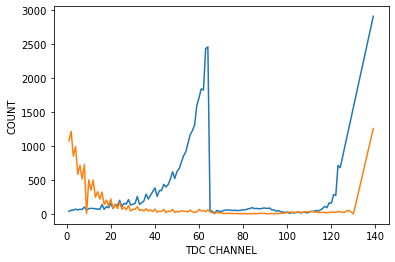

In [39]:
import matplotlib.pyplot as plt

#For FPGA=0
FPGA_0=df[df['FPGA']==0] 
print(FPGA_0)
TDC_COUNT_0=FPGA_0.groupby('TDC_CHANNEL').TDC_CHANNEL.count()
print(TDC_COUNT_0)
TDC_COUNT_0.plot()

#labeling axis
plt.xlabel("TDC CHANNEL")
plt.ylabel("COUNT")


#For FPGA=1
FPGA_1=df[df['FPGA']==1]
print(FPGA_1)
TDC_COUNT_1 = FPGA_1.pivot_table(index=['TDC_CHANNEL'], aggfunc='size')
print(TDC_COUNT_1)
TDC_COUNT_1.plot()

#labeling axis
plt.xlabel("TDC CHANNEL")
plt.ylabel("COUNT")
